In [ ]:
# Exploración Inicial de Datos (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('plant_health_data.csv')

In [7]:
# Vista general
print("Primeras filas:")
print(df.head())

Primeras filas:
                    Timestamp  Plant_ID  Soil_Moisture  Ambient_Temperature  \
0  2024-10-03 10:54:53.407995         1      27.521109            22.240245   
1  2024-10-03 16:54:53.407995         1      14.835566            21.706763   
2  2024-10-03 22:54:53.407995         1      17.086362            21.180946   
3  2024-10-04 04:54:53.407995         1      15.336156            22.593302   
4  2024-10-04 10:54:53.407995         1      39.822216            28.929001   

   Soil_Temperature   Humidity  Light_Intensity   Soil_pH  Nitrogen_Level  \
0         21.900435  55.291904       556.172805  5.581955       10.003650   
1         18.680892  63.949181       596.136721  7.135705       30.712562   
2         15.392939  67.837956       591.124627  5.656852       29.337002   
3         22.778394  58.190811       241.412476  5.584523       16.966621   
4         18.100937  63.772036       444.493830  5.919707       10.944961   

   Phosphorus_Level  Potassium_Level  Chloroph

In [27]:
print("\nResumen de datos:")
print(f"Total de registros: {len(df)}")
df['Timestamp1'] = pd.to_datetime(df['Timestamp'])
total_days = df['Timestamp1'].dt.date.nunique()
max_timestamp = df['Timestamp'].max()
min_timestamp = df['Timestamp'].min()
total_plants = df['Plant_ID'].nunique()
print(f"total de dias: {total_days}")
print(f"Rango de fechas: {min_timestamp} a {max_timestamp}")
print(f"Total de plantas únicas: {total_plants}")


Resumen de datos:
Total de registros: 1200
total de dias: 31
Rango de fechas: 2024-10-03 10:54:53.407995 a 2024-11-02 04:54:53.493508
Total de plantas únicas: 10


In [8]:

print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
          Plant_ID  Soil_Moisture  Ambient_Temperature  Soil_Temperature  \
count  1200.000000    1200.000000          1200.000000       1200.000000   
mean      5.500000      25.106918            23.999130         19.957794   
std       2.873479       8.677725             3.441561          2.932073   
min       1.000000      10.000724            18.001993         15.003710   
25%       3.000000      17.131893            21.101766         17.353027   
50%       5.500000      25.168333            23.889044         19.911473   
75%       8.000000      32.370231            27.042634         22.596851   
max      10.000000      39.993164            29.990886         24.995929   

          Humidity  Light_Intensity      Soil_pH  Nitrogen_Level  \
count  1200.000000      1200.000000  1200.000000     1200.000000   
mean     54.853165       612.637265     6.524102       30.106751   
std       8.784916       228.318853     0.581755       11.514396   
min      40.028758   

In [9]:

print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Timestamp                 0
Plant_ID                  0
Soil_Moisture             0
Ambient_Temperature       0
Soil_Temperature          0
Humidity                  0
Light_Intensity           0
Soil_pH                   0
Nitrogen_Level            0
Phosphorus_Level          0
Potassium_Level           0
Chlorophyll_Content       0
Electrochemical_Signal    0
Plant_Health_Status       0
dtype: int64


In [10]:

print("\nDistribución de la variable objetivo:")
print(df['Plant_Health_Status'].value_counts())


Distribución de la variable objetivo:
Plant_Health_Status
High Stress        500
Moderate Stress    401
Healthy            299
Name: count, dtype: int64


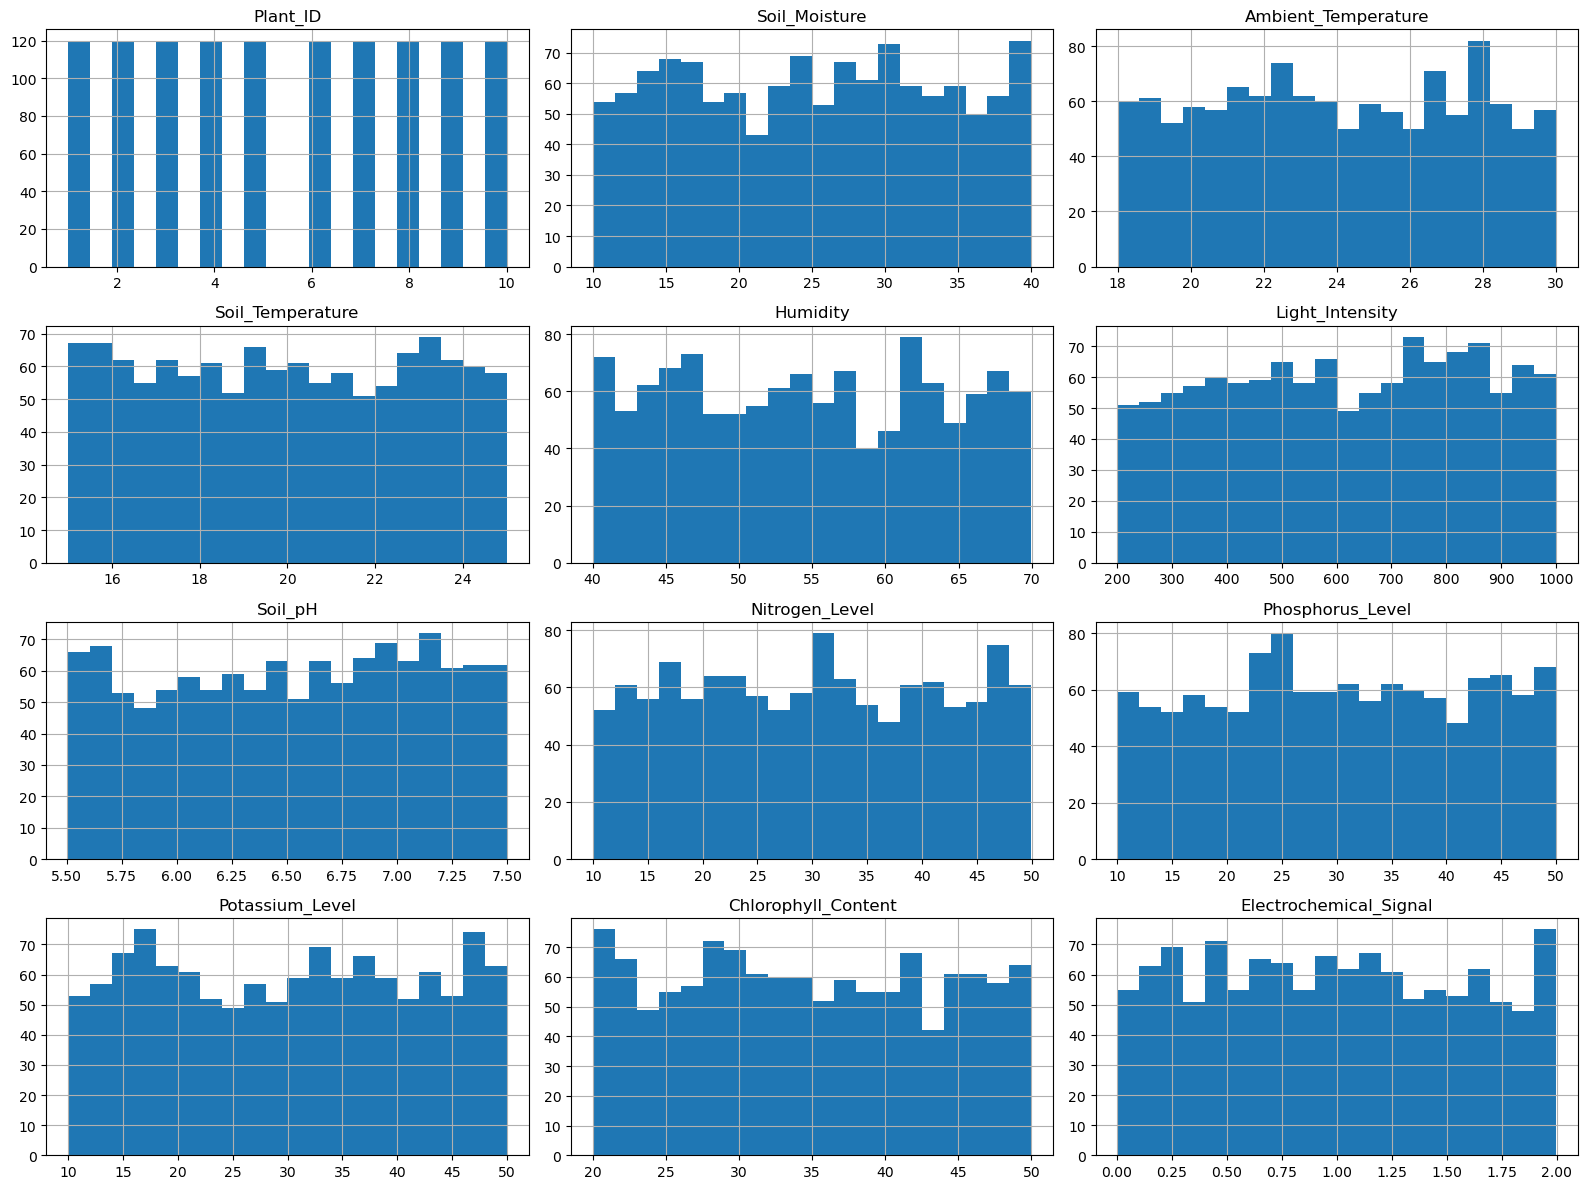

In [11]:

# Histogramas de variables numéricas
df.hist(figsize=(16,12), bins=20)
plt.tight_layout()
plt.show()


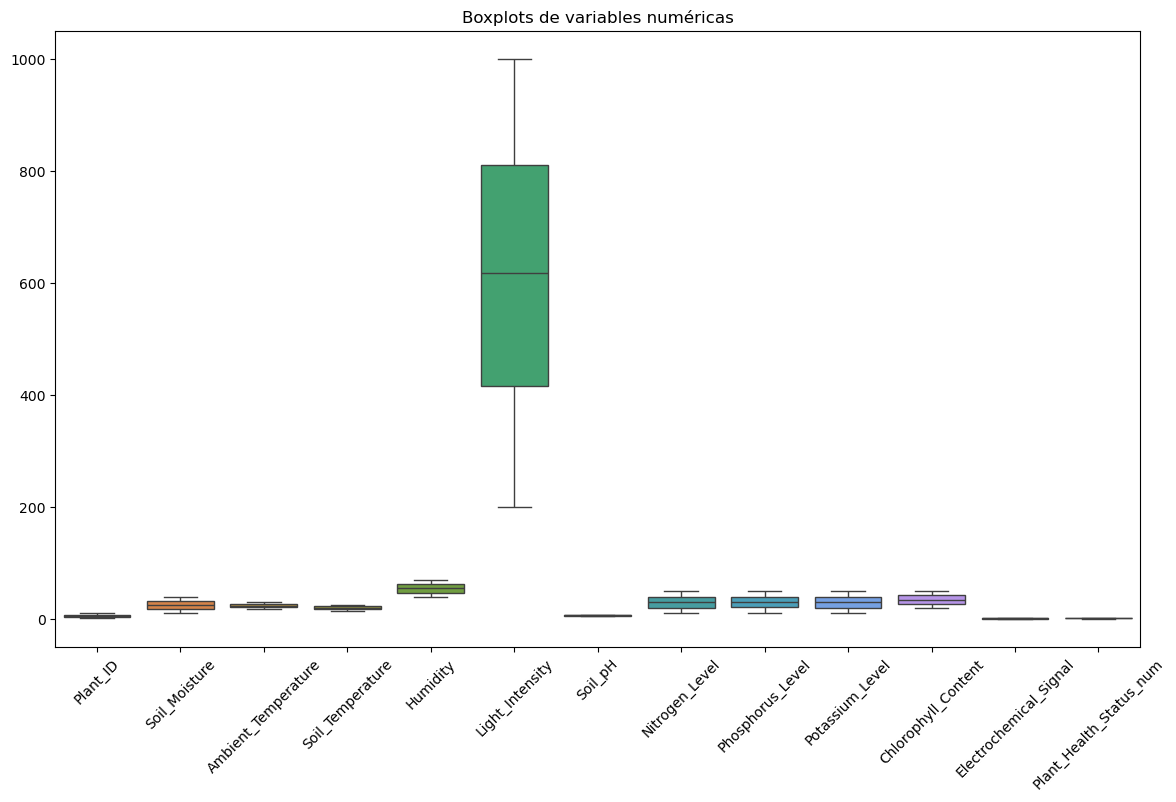

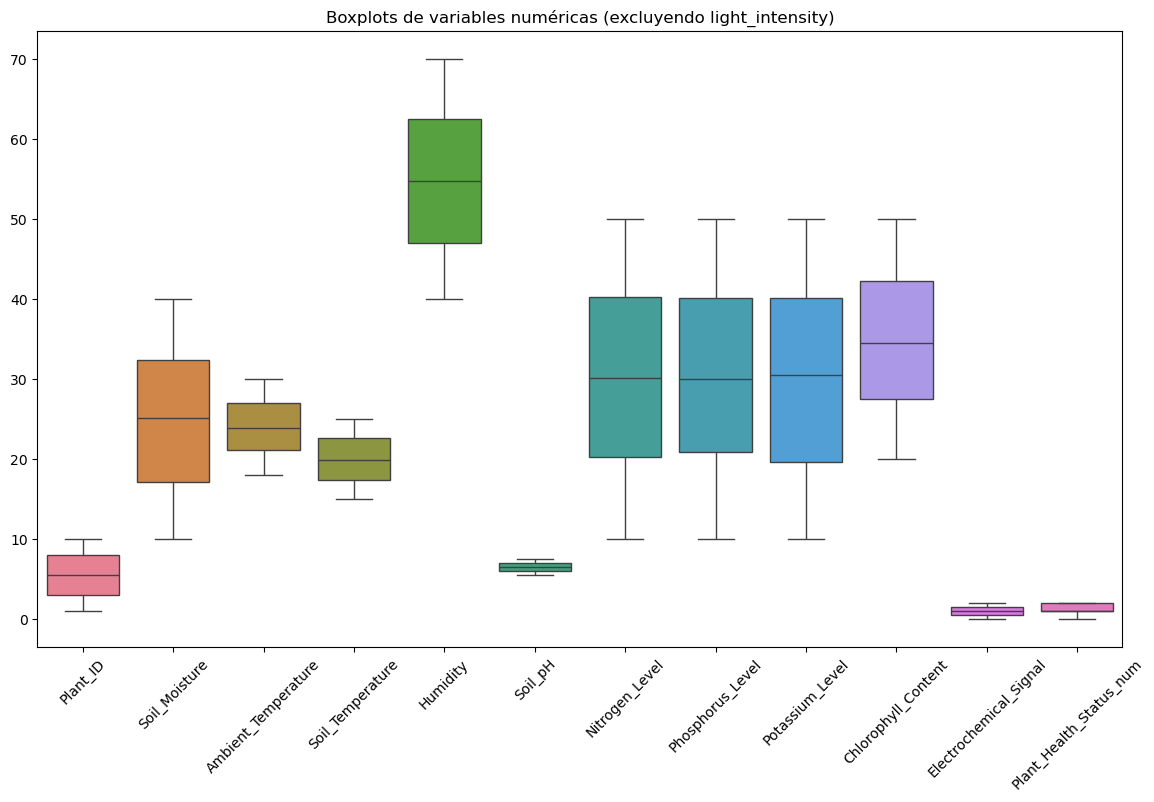

In [29]:

# Boxplots para identificar outliers
plt.figure(figsize=(14,8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title('Boxplots de variables numéricas')
plt.show()

df_filtered = df.drop(columns=['Light_Intensity'])
plt.figure(figsize=(14,8))
sns.boxplot(data=df_filtered.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title('Boxplots de variables numéricas (excluyendo light_intensity)')
plt.show()


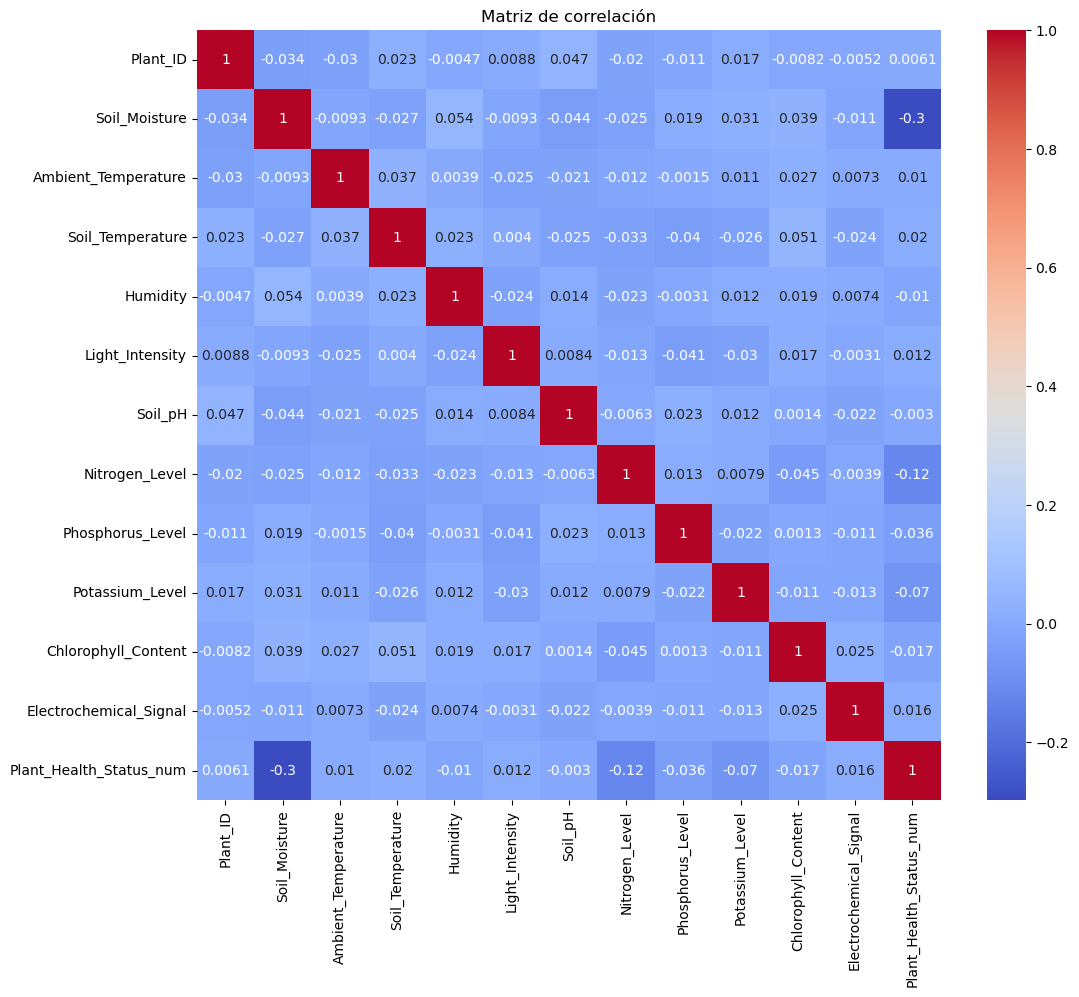


Correlación de Plant_Health_Status_num con otras variables:
Plant_Health_Status_num    1.000000
Soil_Temperature           0.019565
Electrochemical_Signal     0.016194
Light_Intensity            0.011885
Ambient_Temperature        0.010043
Plant_ID                   0.006116
Soil_pH                   -0.003037
Humidity                  -0.010071
Chlorophyll_Content       -0.017020
Phosphorus_Level          -0.036100
Potassium_Level           -0.070483
Nitrogen_Level            -0.117730
Soil_Moisture             -0.297279
Name: Plant_Health_Status_num, dtype: float64


In [19]:
# Heatmap de correlación
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

df['Plant_Health_Status_num'] = df['Plant_Health_Status'].astype('category').cat.codes
corr_new = df.select_dtypes(include=['number']).corr()

print("\nCorrelación de Plant_Health_Status_num con otras variables:")
print(corr_new['Plant_Health_Status_num'].sort_values(ascending=False))

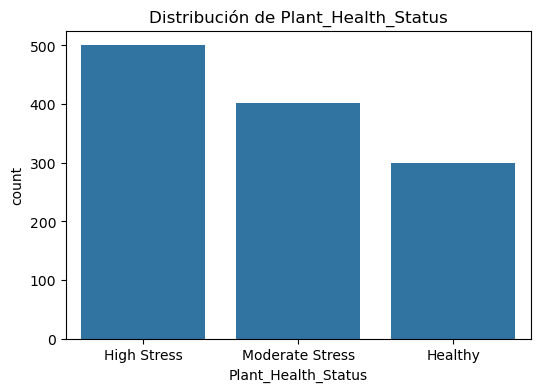

In [14]:
# Gráfico de barras de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x='Plant_Health_Status', data=df)
plt.title('Distribución de Plant_Health_Status')
plt.show()